In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ising Model Dynamics
Reference: *Modelling Brain Function* by Daniel Amit, Chapter 3

## Noisy asynchronous dynamics with detailed balance

In [72]:
# Total energy (eqn 3.59) (no external field)
def energy(J, S):
    return -0.5*(S.dot(J.dot(S)))

# Determine whether or not spin k flips
def asynch_update(J, S, T, k):
    delta_E = 2.*S[k]*(J[k].dot(S)) # Change in energy due to flipping spin k (eqn 3.60)
    flip_prob = np.exp(-delta_E/T)
    random = np.random.rand()
    
    if (delta_E < 0) or (random < flip_prob):
        return -S[k]
    else:
        return S[k]
            
# Update each spin according to array order (arbitrary) and plot energy and magnetization
def update_and_plot(J, S, T):
    time = range(len(S))
    energies = np.zeros(len(S))
    magnetizations = np.zeros(len(S))
    
    print("Initial spin configuration:")
    print(S)

    for t in time:
        energies[t] = energy(J, S)
        magnetizations[t] = np.average(S)
        S[t] = asynch_update(J, S, T, t)
    
    print("Final spin configuration:")
    print(S)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.ylabel('Energy')
    plt.plot(time, energies, 'ko')

    plt.subplot(2, 1, 2)
    plt.ylabel('Magnetization')
    plt.plot(time, magnetizations, 'ko')
    plt.xlabel('Update steps')
    plt.show()

Initial spin configuration:
[-1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1]
Final spin configuration:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


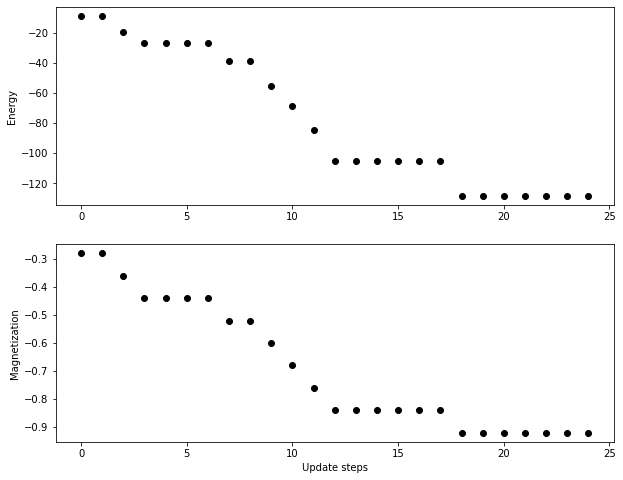

In [90]:
# Choose a system size
N = 25

# Random positive interactions with detailed balance
J_rand = np.random.uniform(0,1,size=(N,N))
J_rand = (J_rand + J_rand.T)/2   # make it symmetric, to satisfy detailed balance
np.fill_diagonal(J_rand, 0)      # make sure the spins don't self-interact

S_rand = np.random.choice([-1,1],size=N)

T_rand = 4


update_and_plot(J_rand, S_rand, T_rand)